-----
offset 0 31 TimeSpan 31
offset 90 120 TimeSpan 30
offset 151 181 TimeSpan 30
-----
offset 31 59 TimeSpan 28
offset 120 151 TimeSpan 31
offset 181 212 TimeSpan 31
-----
offset 31 40 TimeSpan 9
offset 59 68 TimeSpan 9
offset 90 99 TimeSpan 9
offset 120 129 TimeSpan 9
offset 151 160 TimeSpan 9
-----
offset 31 120 TimeSpan 89


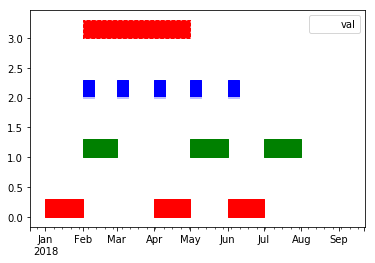

In [3]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from cycler import cycler
from datetime import datetime, timedelta

idx = pd.date_range('2018-1-1', '2018-9-10', freq='1D')
df = pd.DataFrame({'Offset': 20,'val': 2}, index=idx)
df['Offset']=[n for n in range(0,len(df))]

sched=[{'name':'tim',
     'jobs':{
          1:(datetime(2018,1,1,),datetime(2018,2,1)),
          2:(datetime(2018,4,1) ,datetime(2018,5,1)),
          3:(datetime(2018,6,1) ,datetime(2018,7,1))}
       },
       {'name':'BiMonthly',
     'jobs':{
          1:(datetime(2018,2,1,),datetime(2018,3,1)),
          2:(datetime(2018,5,1) ,datetime(2018,6,1)),
          3:(datetime(2018,7,1) ,datetime(2018,8,1))}
       }
       ,
          {'name':'Monthly',
     'jobs':{
           1:(datetime(2018,2,1),datetime(2018,2,10)),
           2:(datetime(2018,3,1),datetime(2018,3,10)),
           3:(datetime(2018,4,1),datetime(2018,4,10)),
           4:(datetime(2018,5,1),datetime(2018,5,10)),
           5:(datetime(2018,6,1),datetime(2018,6,10))
         }},
        {'name':'LongTerm',
     'jobs':{
           1:(datetime(2018,2,1),datetime(2018,5,1))
         }
        }]

color_cycle = cycler(c=['r', 'g', 'b'])
ls_cycle = cycler('ls', ['-', '--'])
sty_cycle = ls_cycle * ( color_cycle)

def get_offset(when):
    global df
    if type(when)==str:
        when=pd.to_datetime(when)
    try:
        return df.loc[when]['Offset']
    except KeyError:
        print("{} Not Found".format(when))
        return -1

thickness=0.3
timelines=[]

start_period = idx[0].to_period('D').ordinal

for a_job_group in sched:
    timeline=[]
    print("-----")
    for keys in a_job_group['jobs']:
        offset_start = get_offset(a_job_group['jobs'][keys][0])
        offset_end   = get_offset(a_job_group['jobs'][keys][1])
        print("offset {} {} TimeSpan {}".format(offset_start, 
                                                offset_end, offset_end - offset_start))  
        timeline_data=(start_period + offset_start,offset_end-offset_start)
        timeline.append(timeline_data)
    timelines.append(timeline)

pos= 0
df.drop(['Offset'],axis=1,inplace=True,)
ax = df.plot(color='w')
col_schema=[s for s in sty_cycle]
for t in timelines:
    ax.broken_barh(t, [pos, thickness],
                   color=col_schema[pos]['c'],
                  linestyle=col_schema[pos]['ls'])
    pos+= 1
plt.show()